Evaluate the following limit:

lim_(x->2) (x^2 + 3x - 10) / (x - 2)


In [3]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = sp.symbols('x')
expr = (x**2 + 3*x - 10)/(x - 2)
limit = sp.limit(expr, x, 2)
print(limit)

7


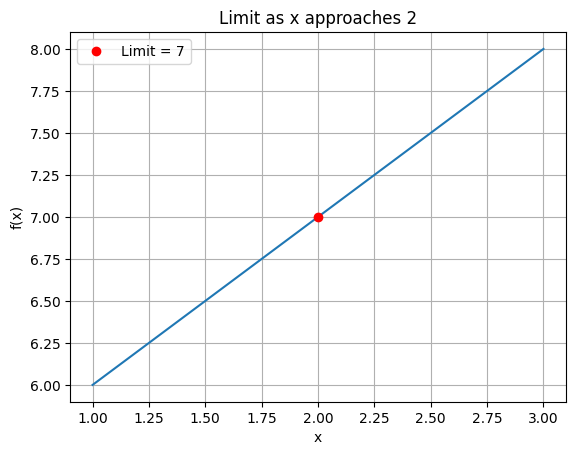

In [ ]:
x_vals = np.linspace(1, 3, 100)  
y_vals = (x_vals**2 + 3*x_vals - 10) / (x_vals - 2)

plt.plot(x_vals, y_vals)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Limit as x approaches 2')

plt.plot(2, limit, 'ro', label=f'Limit = {limit}') 

plt.legend()
plt.grid(True)
plt.show()

Find the derivative of the function:

f(x) = 3x^2 - 2x + 5

In [5]:
x = sp.symbols('x')
expr = (3*x**2 - 2*x + 5)
derivative = sp.diff(expr, x)
print(derivative)

6*x - 2


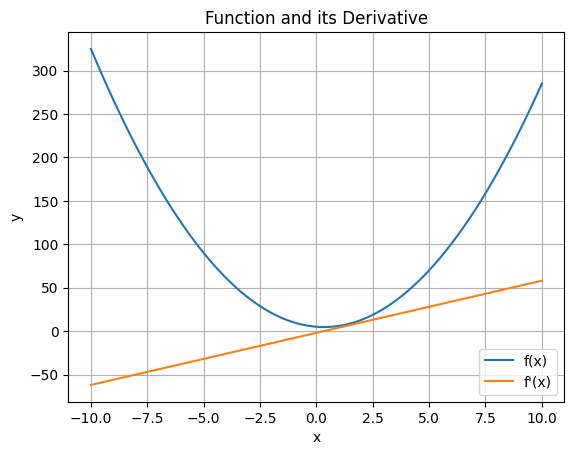

In [11]:
x_vals = np.linspace(-10, 10, 100)

y_vals_f = 3*x_vals**2 - 2*x_vals + 5
y_vals_derivative = 6*x_vals - 2

plt.plot(x_vals, y_vals_f, label='f(x)')
plt.plot(x_vals, y_vals_derivative, label="f'(x)")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function and its Derivative')
plt.legend()
plt.grid(True)
plt.show()

Find the derivative of the function:

g(x) = sin(x^2) 


In [12]:
x = sp.symbols('x')
g = sp.sin(x**2)
derivative = sp.diff(g, x)
print(derivative)

2*x*cos(x**2)


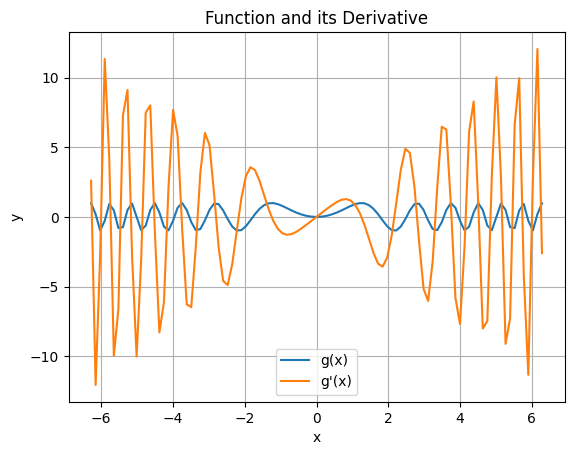

In [13]:
x_vals = np.linspace(-2*np.pi, 2*np.pi, 100)

y_vals_g = np.sin(x_vals**2)
y_vals_derivative = 2*x_vals*np.cos(x_vals**2)

plt.plot(x_vals, y_vals_g, label='g(x)')
plt.plot(x_vals, y_vals_derivative, label="g'(x)")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function and its Derivative')
plt.legend()
plt.grid(True)
plt.show()

Find the gradient of the function:

h(x, y) = x^2 + 2xy + y^3

In [14]:
x, y = sp.symbols('x y')
h = x**2 + 2*x*y + y**3
partial_derivative_x = sp.diff(h, x)
partial_derivative_y = sp.diff(h, y)

gradient = [partial_derivative_x, partial_derivative_y]
print(f"Gradient of h(x,y): {gradient}")

Gradient of h(x,y): [2*x + 2*y, 2*x + 3*y**2]


Find the definite integral of the function:

∫(2x + 3) dx  from x = 1 to x = 3


In [15]:
x = sp.symbols('x')
f = 2*x +3
integral = sp.integrate(f, (x,1,3))
print(integral)

14


a) Find the directional derivative of the function:

f(x, y) = x^2*y + y^2  at the point (1, 2) in the direction of the vector v = [3, 4].



In [18]:
x, y = sp.symbols('x y')
f = x**2*y + y**2

gradient = [sp.diff(f, x), sp.diff(f, y)]

gradient_at_point = [gradient[0].subs({x: 1, y: 2}), gradient[1].subs({x: 1, y: 2})]
v = np.array([3,4])
v_norm = v/np.linalg.norm(v)

directional_derivative = np.dot(gradient_at_point, v_norm)
print(f"Directional Derivative: {directional_derivative}")


Directional Derivative: 6.40000000000000


Consider a simple neural network with one input x, one hidden layer with one neuron (activation function: sigmoid), and one output neuron (activation function: linear).

    Weights: w1 (input to hidden), w2 (hidden to output)
    Biases: b1 (hidden), b2 (output)

The loss function is Mean Squared Error (MSE).

a) Write the forward pass equations.
b) Calculate the partial derivatives of the loss function with respect to w1, w2, b1, and b2 using the chain rule.

In [19]:
x, w1, w2, b1, b2, y_true = sp.symbols('x w1 w2 b1 b2 y_true')

#forward pass
hidden_output = 1/(1 + sp.exp(-(w1*x + b1))) #sigmoid activation function
y_pred = w2*hidden_output + b2 #linear activation function

#Loss function (MSE)
loss = (y_true - y_pred)**2

#Partial derivatives
d_loss_w1 = sp.diff(loss, w1)
d_loss_w2 = sp.diff(loss, w2)
d_loss_b1 = sp.diff(loss, b1)
d_loss_b2 = sp.diff(loss, b2)
print(f"d_loss_w1: {d_loss_w1}")
print(f"d_loss_w2: {d_loss_w2}")
print(f"d_loss_b1: {d_loss_b1}")
print(f"d_loss_b2: {d_loss_b2}")

d_loss_w1: -2*w2*x*(-b2 - w2/(exp(-b1 - w1*x) + 1) + y_true)*exp(-b1 - w1*x)/(exp(-b1 - w1*x) + 1)**2
d_loss_w2: -2*(-b2 - w2/(exp(-b1 - w1*x) + 1) + y_true)/(exp(-b1 - w1*x) + 1)
d_loss_b1: -2*w2*(-b2 - w2/(exp(-b1 - w1*x) + 1) + y_true)*exp(-b1 - w1*x)/(exp(-b1 - w1*x) + 1)**2
d_loss_b2: 2*b2 + 2*w2/(exp(-b1 - w1*x) + 1) - 2*y_true


Implement gradient descent to find the minimum of the function:

f(x) = x^4 - 3x^3 + 2

4*x**3 - 9*x**2
critical points: [0, 9/4]
Optimal value of x: 2.25000000000000


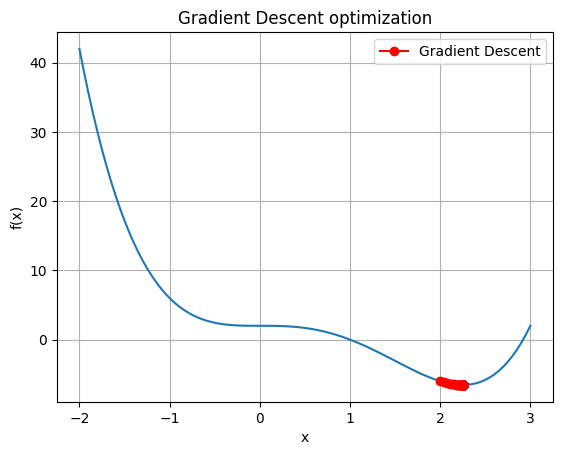

In [21]:
x = sp.symbols('x')
f = x**4 - 3*x**3 + 2
df = sp.diff(f, x)

print(df)
print("critical points:", sp.solve(df, x))

# gradient descent parameters
learning_rate = 0.01
num_iterations = 1000
x_start = 2

# gradient Descent
x_history = [x_start]
for i in range(num_iterations):
    x_start = x_start - learning_rate*df.subs(x, x_start)
    x_history.append(x_start)

print(f"Optimal value of x: {x_start}")

x_vals = np.linspace(-2, 3, 100)
y_vals = [f.subs(x, val) for val in x_vals]
plt.plot(x_vals, y_vals)
plt.plot(x_history, [f.subs(x, i) for i in x_history], 'ro-', label='Gradient Descent')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent optimization')
plt.legend()
plt.grid(True)
plt.show()

Calculate the Hessian matrix of the function:

g(x, y) = x^3 + y^3 - 3xy


In [22]:
x, y = sp.symbols('x y')
g = x**3 + y**3 - 3*x*y

# second-order partial derivatives
d2_dx2 = sp.diff(sp.diff(g, x), x)
d2_dy2 = sp.diff(sp.diff(g, y), y)
d2_dxdy = sp.diff(sp.diff(g, x), y)

hessian = sp.Matrix([[d2_dx2, d2_dxdy],
                    [d2_dxdy, d2_dy2]])

print("Hessian Matrix:")
print(hessian)

Hessian Matrix:
Matrix([[6*x, -3], [-3, 6*y]])
